# Exercise 6

In [101]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_1887/3249319355.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [102]:
# Importing the dataset
df = pd.read_csv('Mall_Customers.csv')

In [103]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### We only need the annual income and spending score features

In [104]:
# Using the .iloc function to retrieve the AnnualIncome and SpendingScore from the dataframe
X = df.iloc[:, [3, 4]].values

#### Plot the unlabeled data

Text(0, 0.5, 'Annual Income')

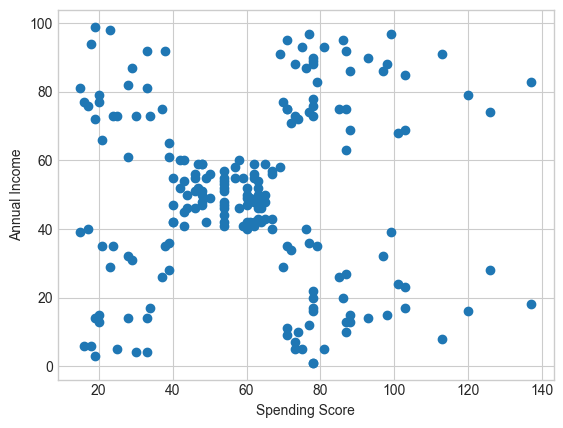

In [105]:
plt.scatter(df.AnnualIncome, df.SpendingScore)
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")

In [106]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Set the radius and number of points per core point

In [107]:
radius = 3
core_point_samples = 4

#### Pass the radius and number of points per core point to the DBSCAN class

In [108]:
# Using the elbow method to find the optimal number of clusters
dbscan = DBSCAN(eps=radius, min_samples=core_point_samples)

#### Train the DBSCAN model

In [109]:
# Fitting the model
model = dbscan.fit(X)

#### Identify the core points

In [110]:
labels = model.labels_

#identifying the points which makes up our core points
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_] = True

#### Get the number of clusters

In [111]:
#Calculating the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters


9

#### Get the number of outliers

In [112]:
n_noise_ = list(labels).count(-1)
n_noise_

121

#### Get the silhoutte score

In [113]:
print(metrics.silhouette_score(X, labels))

-0.1908319132560097


#### Plot the clusters

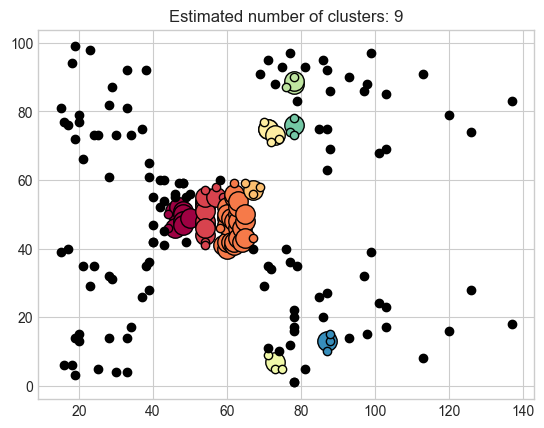

In [114]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters}")
plt.show()

## K-Means

In [115]:
clusters = 4

In [116]:
kmeans = KMeans(n_clusters=clusters)

In [117]:
kmeans.fit(X)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [118]:
y_kmeans = kmeans.predict(X)

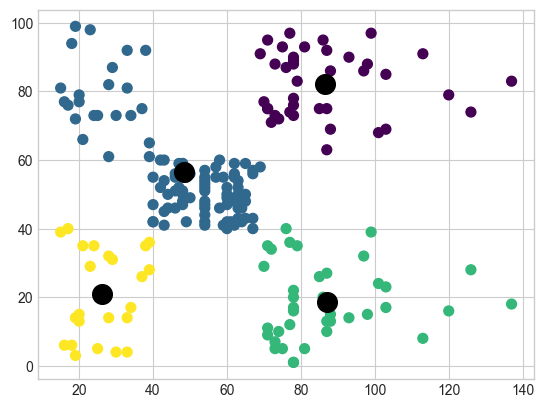

In [119]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);